Creator: Ryan Corbyn 


Date Created: 17/10/2020


Dates modified: 


This code is designed to load in the resonant frequency vs temperature data file that has been created from the analysis of the NVScan_analysis.dat file.
The data file is read into a pandas array and then 3 graphs are made. The first two plot how the strain split peaks of the NV centre vary as temperature is increased. The third one rapresents the shift of the resonant frequnecy of the NV centre with temperature if there were no applied magnetic fields or strain splitting. This "Central frequency" is determined from the mean of the resonant frequencies of the strain split peaks. 

A linear fit is then made to the data (or in the first instance a portion of this data) to determine the change of resoanant frequnecy with temperature for the nanodiamond in question. 

The errors associated with these measurements (at least when first created) are derived from the standard deviation of multiple measurements that have been made on the same nanodiamond at each temperature step. 

The plots are then exported and saved as .png and .pdf files in the appropriate data folder within the users H drive.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plot 
import scipy.optimize as opt
import os

In [2]:
def get_data(folder_path, file_name):
    # Import the data file data into a Pandas array. 
    file_path = folder_path + file_name
    
    data_frame = pd.read_table(file_path)
    
    return(data_frame)

In [3]:
def linear_graph(x, m, c):
    # creates a linear fit
    y = m*x + c
    return(y)

In [4]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [5]:
def get_central_frequency(data_frame):
    # Calculate the central resonant frequency of the NV centre
    # by finding the mean of the two saved resonant frequencies. 
    # The error for this value is found by the square root of 
    # sum squared for the two resonant frequencies errors. 
    
    central_freq = np.array((data_frame['Resonant frequency 1 (GHz)'] + 
                             data_frame['Resonant frequency 2 (GHz)'])/2)
    central_freq_error = np.array(np.sqrt(np.power(data_frame['Error Resonant frequency 1 (GHz)'],2) +
                                np.power(data_frame['Error Resonant frequency 2 (GHz)'],2)))
    
    return(central_freq, central_freq_error)
    

In [6]:
def get_temp_array(data_frame):
    # Extracts the temperature from the data frame. 
    
    temperature = np.array(data_frame['Temperature (oC)'])
    
    return(temperature)

In [7]:
def get_ND_array(data_frame):
    # Get the ND number array
    
    nds = np.array(data_frame['ND'])
    return(nds)

In [8]:
def get_FWHM_average(data_frame):
    # Calculate the mean value of the FWHM. This value is then 
    # converted to GHz. 
    # The error for this value is found by the square root of 
    # sum squared for the two resonant frequencies errors. 
    
    FWHM_mean = np.array((data_frame['FWHM 1 (MHz)'] + 
                             data_frame['FWHM 2 (MHz)'])/2)*0.001
    FWHM_mean_error = np.array(np.sqrt(np.power(data_frame['FWHM 1 error (MHz)'],2) +
                                np.power(data_frame['FWHM 1 error (MHz)'],2)))*0.001
    
    return(FWHM_mean, FWHM_mean_error)

In [9]:
def optimise_linear_fit(temp, res_freq):
    # A method to find the fitting prameters for the ODMR dataset. 
    init_params = [1,1]
    coeffs, confidence = opt.curve_fit(linear_graph, temp, res_freq, init_params)
    opt_error = np.sqrt(np.diag(confidence))
    
    return(coeffs, opt_error)

In [10]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [11]:
def save_data(folder_path, date, coeffs, errors, r_squared, nd_number, fig):
    
    destination_folder = folder_path + 'Temperature_sensing\\'
    output_data_file = destination_folder + date + '_Thermometry_plot_fitting_data.dat'
    
    # Checking to see if the folder exists in which to save the data, and creating it if it does not
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
        # Checking the output file exists and creating and initialising it if not
    
    if os.path.isfile(output_data_file) == False:
        with open(output_data_file, "w") as wf:
            wf.write('ND' +  ', \t' + 'Gradient (kHz/oC)' + '\t' + 'Gradient error (kHz/oC)' + '\t'
                    + 'intercept (GHz)' + '\t' + 'intercept error (GHz)' + '\t' + 'R Squared' + '\n')
            
    with open(output_data_file, "a") as wf:
        wf.write(str(nd_number) + '\t' + str(coeffs[0]*10**6) + '\t' +
                 str(errors[0]*10**6) + " \t"  + str(coeffs[1]) + " \t" + 
                 str(errors[1]) + " \t"  +  str(r_squared) + '\n')
                 
    fig.savefig(destination_folder + 'Thermometry_fit_ND_' + str(nd_number) + '.pdf', transparent = True)    
    fig.savefig(destination_folder + 'Thermometry_fit_ND_' + str(nd_number) + '.png', transparent = True) 

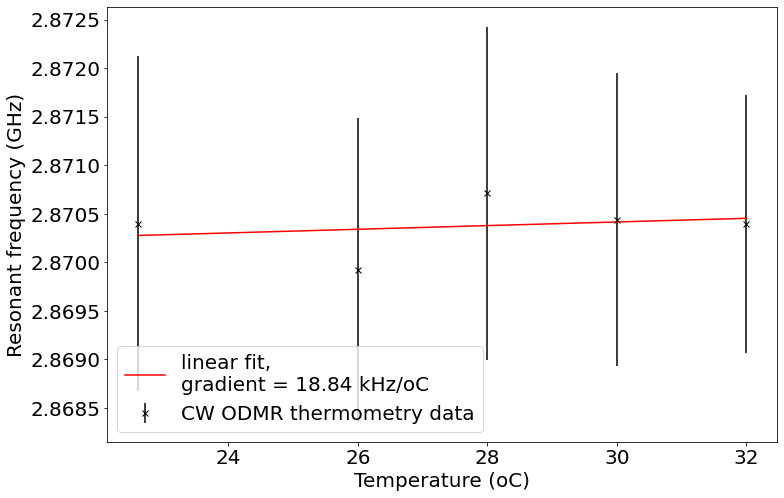

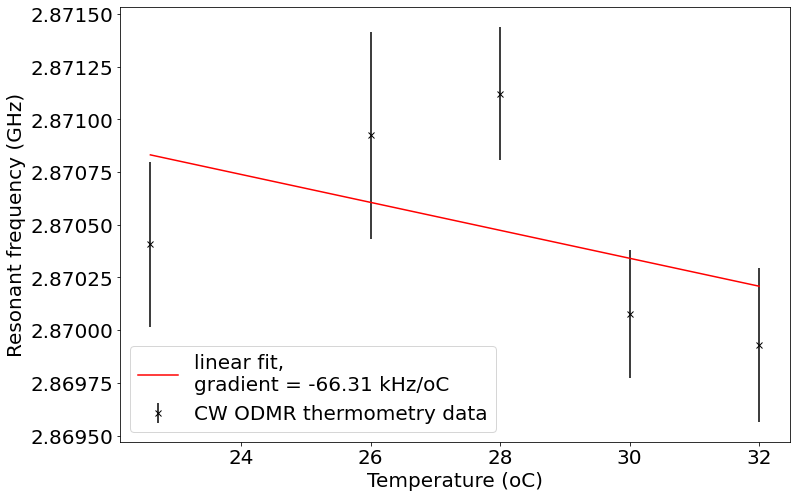

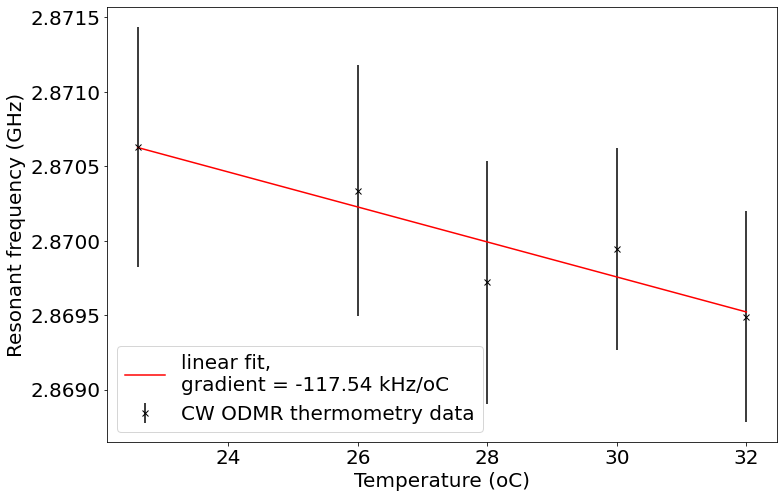

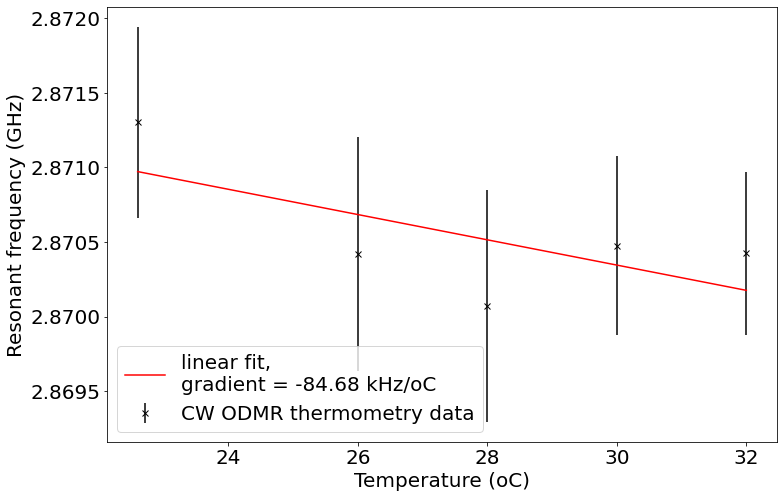

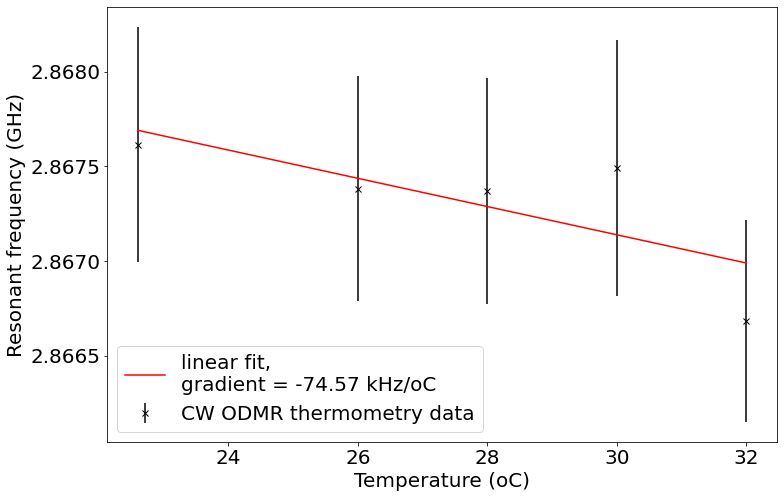

In [13]:
#Get the data file path and pass it to the get_data() method. 
folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Graphs_and_analysis\\Thermometry\\20201015\\'
file_name = '20201015_NVScan_analysis.dat'
date = '20201015'
experiment_data = get_data(folder_path, file_name)
experiment_data_sorted = experiment_data.sort_values(by=['ND', 'Temperature (oC)'])

central_freq, central_freq_error = get_central_frequency(experiment_data_sorted)
temperature = get_temp_array(experiment_data_sorted)
nds = get_ND_array(experiment_data_sorted)

plot.rcParams.update({'font.size' : 20})
plot.rcParams.update({'figure.figsize' :[12, 8]})

for i in range(5):
    fig = plot.figure()
    plot.errorbar(temperature[(i)*5:(i)*5+5], central_freq[(i)*5:(i)*5+5], 
                  central_freq_error[(i)*5:(i)*5+5], linestyle = '',
                  label='CW ODMR thermometry data', marker = 'x', 
                 color = 'k')
    
    fit_params, fit_errors = optimise_linear_fit(temperature[(i)*5:(i)*5+5], 
                                                 central_freq[(i)*5:(i)*5+5])
    y = linear_graph(temperature[(i)*5:(i)*5+5], fit_params[0], fit_params[1])
    
    plot.plot(temperature[(i)*5:(i)*5+5], y, label = 'linear fit,\ngradient = ' + 
              str(np.round(fit_params[0]*10**6,2)) + ' kHz/oC', color = 'r')
    plot.xlabel('Temperature (oC)')
    plot.ylabel('Resonant frequency (GHz)')
    plot.legend(loc='lower left')
    
    r_squared = get_r_squared(temperature[(i)*5:(i)*5+5], central_freq[(i)*5:(i)*5+5], y)
    
    save_data(folder_path, date, fit_params, fit_errors, r_squared, i+1, fig)
    

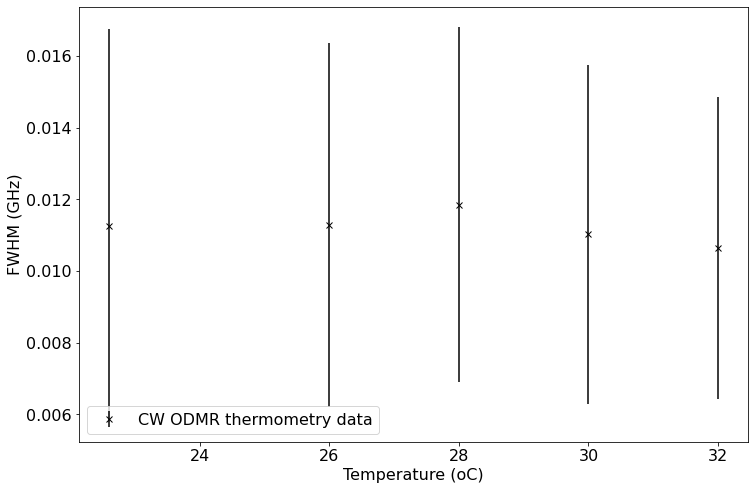

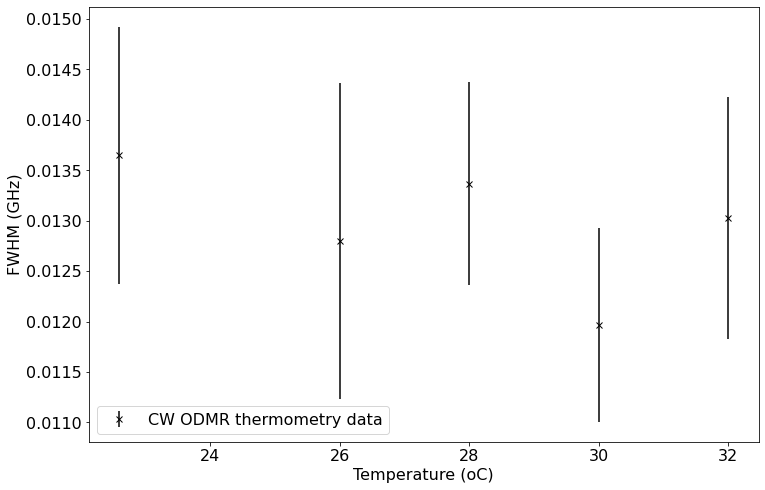

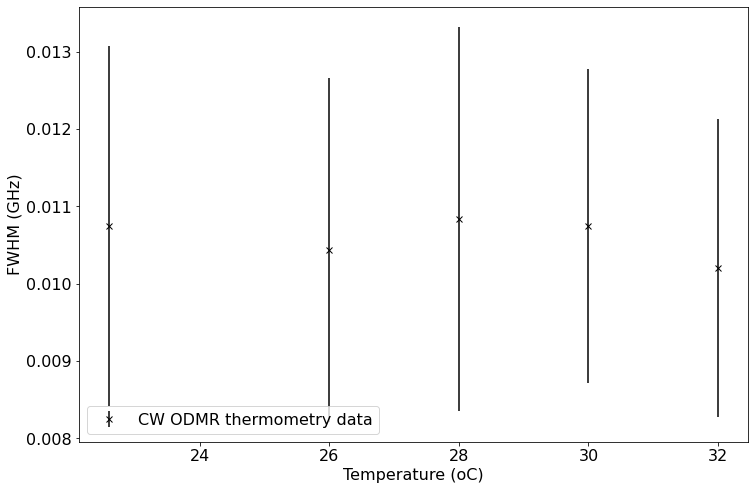

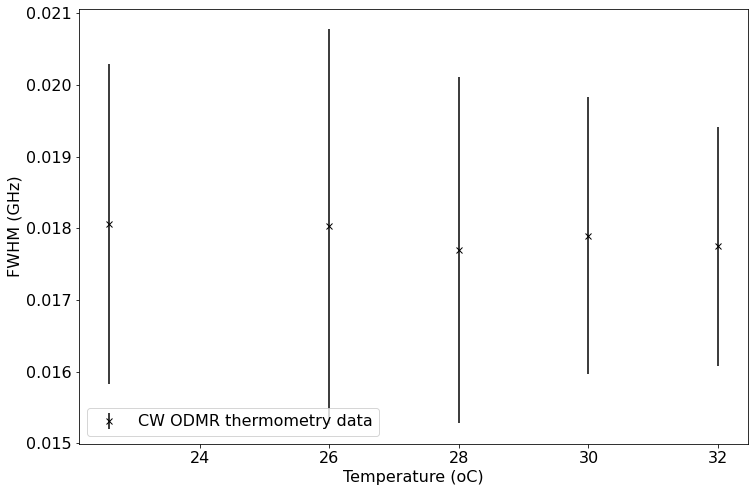

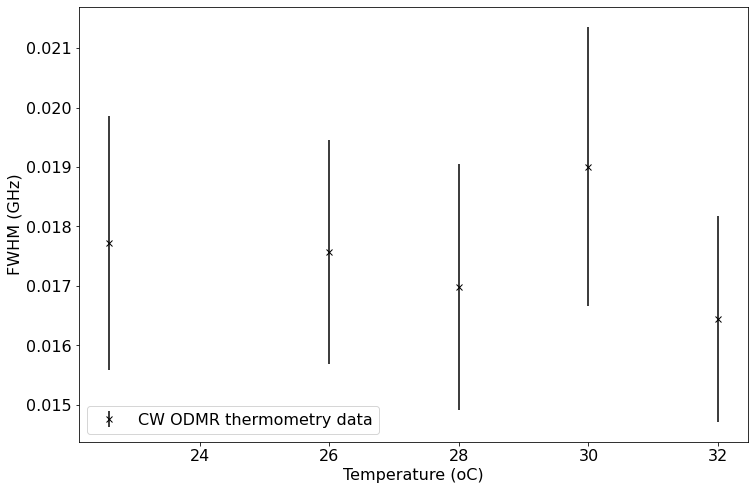

In [14]:
fwhm, error_fwhm = get_FWHM_average(experiment_data_sorted)

for i in range(5):
    fig = plot.figure()
    plot.errorbar(temperature[(i)*5:(i)*5+5], fwhm[(i)*5:(i)*5+5], 
                  error_fwhm[(i)*5:(i)*5+5], linestyle = '',
                  label='CW ODMR thermometry data', marker = 'x', 
                 color = 'k')
    
    #fit_params, fit_errors = optimise_linear_fit(temperature[(i)*5:(i)*5+5], 
      #                                           central_freq[(i)*5:(i)*5+5])
    #y = linear_graph(temperature[(i)*5:(i)*5+5], fit_params[0], fit_params[1])
    
    #plot.plot(temperature[(i)*5:(i)*5+5], y, label = 'linear fit,\ngradient = ' + 
    #          str(np.round(fit_params[0]*10**6,2)) + ' kHz/oC', color = 'r')
    plot.xlabel('Temperature (oC)')
    plot.ylabel('FWHM (GHz)')
    plot.legend(loc='lower left')